# Cse B5-221710305023-Krishna Samhitha.P

# Prediction of heart diseases occurence

# Dataset Columns Featrures Explanation
1.Age (In years)

2.Sex 1 - Male 0 - Female

3.CP (Chest Pain Type)  0 - Typical Angina (Heart related) 1 - Atypical Angina (Non-heart related) 2 - Non-Anginal pain (Non-heart related) 3 - Asymptomatic (No disease)

4.TRESTBPS (Resting Blood Pressure (in mm Hg on admission to the hospital))

5.CHOL (Serum Cholestoral in mg/dl) Healthy serum cholesterol is less than 200 mg/dL

6.FPS (Fasting blood sugar > 120 mg/dl) 1 - True 0 - False

7.RESTECH (Resting Electro Cardio Graphic results)

8.THALACH (Maximum heart rate achieved)

9.EXANG (Exercise induced Angina) 1 - Yes 0 - No

10.OLDPEAK (ST depression induced by exercise relative to rest)

11.SLOPE (Slope of the peak exercise ST segment)
12.CA (Number of major vessels (0-3) colored by Flouroscopy)

13.THAL 0 - Normal 1 - Fixed defect 2 - Reversible defect

14.TARGET 1 - Heart Problem 0 - No Heart Problem

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.1
1.18.1
0.10.0


In [3]:
pwd

'C:\\Users\\krishnavm'

In [4]:
#reading data
data=pd.read_csv(r"C:\Users\krishnavm\heart.csv")
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [5]:
data.shape

(1025, 14)

## handling missing values

In [6]:
#get info regarding all null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### we can see that there are no missing values

# Statastical Analysis

In [8]:
# checking the data type of any column
data.age.dtype

dtype('int64')

In [9]:
type(data.age[0])

numpy.int64

In [10]:
data.columns.value_counts()

target      1
slope       1
fbs         1
ca          1
thal        1
sex         1
chol        1
age         1
exang       1
oldpeak     1
cp          1
trestbps    1
thalach     1
restecg     1
dtype: int64

In [11]:
#checking the occurances or frequency of values in a particular column
data['age'].value_counts() #mode

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
63    32
41    32
67    31
61    31
55    30
65    27
43    26
53    26
42    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
40    11
71    11
69     9
34     6
37     6
29     4
76     3
74     3
77     3
Name: age, dtype: int64

In [12]:
#checking for duplicated values
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
#checking for duplicated values in a particular column
data[data['age'].duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
17,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
data.mean()

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [16]:
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,204,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# calculating mode for a particular column
data.age.mode()

0    58
dtype: int64

In [18]:
#getting unique entries in each column
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [19]:
#distribution of the range of ages for heart attack i.e renaming columns for convinience
data.columns=['age','Gender','ChestPain','RestingBloodPressure','Cholestrol','FastingBloodPressure','RestingEcg',
              'MaxHeartRateAchieved','ExerciseIndusedAngina','OldPeak','Slope','MajorVessels','ThalasSemia','Target']

In [20]:
data.head()

,age,Gender,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodPressure,RestingEcg,MaxHeartRateAchieved,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,ThalasSemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Visualization

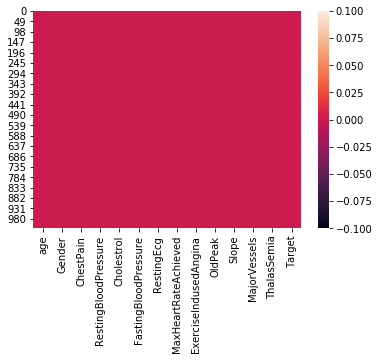

In [21]:
# Visualizing the missing values with heatmap
sns.heatmap(data.isna())

In [23]:
bg_color = (0.25, 0.25, 0.25)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':25,
            'figure.figsize':(10.0,5.0),
            'xtick.labelsize':15,
            'ytick.labelsize':15})  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024898F14C48>,
      dtype=object)

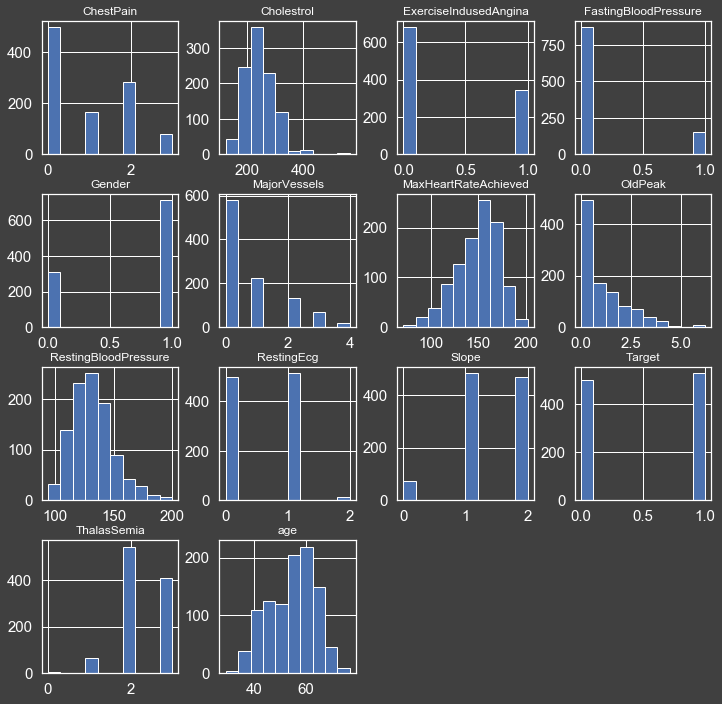

In [24]:
data.hist(figsize=(12,12))

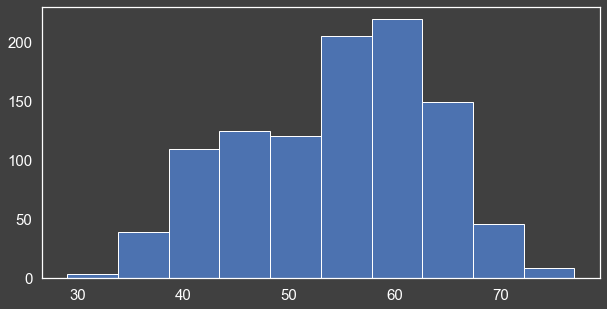

In [25]:
data['age'].hist(grid=False)

### Majority of people get heart attack around the age 55-60

In [26]:
#giving corresponding numbers for different causes of  heart heart diseases 
result=[]
for i in data['ChestPain']:
    if i == 0:
        result.append('Typical Angina')
    if i ==1:
        result.append('Atypical Angina')
    if i ==2:
        result.append('Non-Anginal')
    if i==3:
        result.append('Asymptomatic')
        
data['ChestPainType']=pd.Series(result)

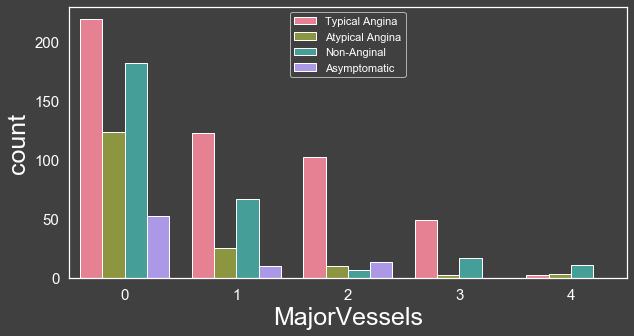

In [27]:
#check the relation of major vessels and chest pain type
ax=sns.countplot(hue=result,x='MajorVessels',data=data,palette='husl')

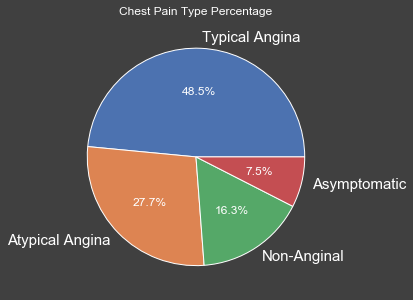

In [28]:
# plot the pie chart indicating distribution of each chest pain type
ChestPain=(data['ChestPainType']).value_counts()
percent_typAng= ChestPain[0] *100/ len(data)
percent_AtypAng=ChestPain[1]*100/len(data)
percent_nonAng=ChestPain[2]*100/len(data)
percent_none=ChestPain[3]*100/len(data)

values= [percent_typAng, percent_AtypAng, percent_nonAng, percent_none]
labels=['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Chest Pain Type Percentage")    
plt.show()

### observation- majority of the type of chest pain is observed to be Typical Angina. so from previous obsevation along with this one we can draw a conclusion that most of the people from age 55-60 experience a typical angina chest pain.

[<matplotlib.patches.Rectangle object at 0x00000248997BBD48>, <matplotlib.patches.Rectangle object at 0x0000024899790A08>, <matplotlib.patches.Rectangle object at 0x00000248997C8108>, <matplotlib.patches.Rectangle object at 0x00000248997BB988>, <matplotlib.patches.Rectangle object at 0x00000248997CC508>, <matplotlib.patches.Rectangle object at 0x0000024899790448>, <matplotlib.patches.Rectangle object at 0x000002489973EF08>, <matplotlib.patches.Rectangle object at 0x00000248997BBB48>]


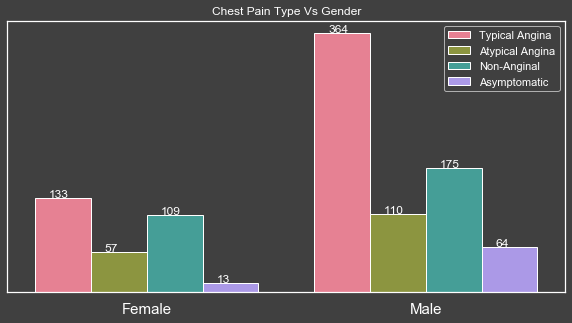

In [29]:
# do a gender comparison 
ax = sns.countplot(hue=result,x='Gender',data=data,palette='husl')

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

### Observation-it can be observed that majority of Typical Angina is experienced by males.

In [30]:
#checking for a healthy heart or heart disease
heart_health=[]
for k in data['Target']:
    if k == 0:
        heart_health.append('Healthy Heart')
    elif k == 1:
        heart_health.append('Heart Disease')

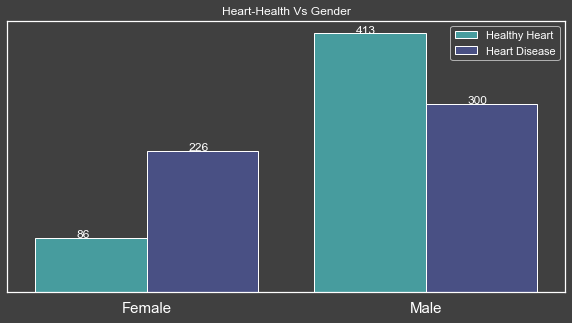

In [31]:
# checking for healthy hearth and heart disease in male and female
ax = sns.countplot(x='Gender',hue=heart_health,data=data,palette='mako_r')

plt.title("Heart-Health Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
ax.set_xticklabels(['Female','Male']);

### Observation- it can be seen that majority heart diseases occur in males.


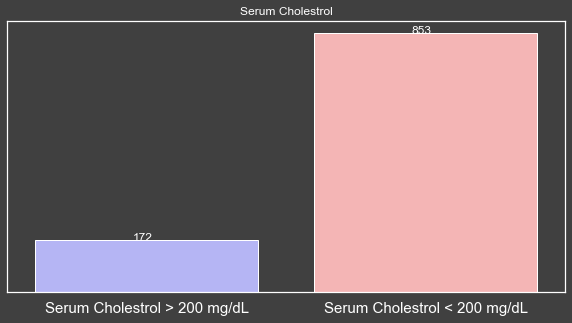

In [32]:
serum_chol=[]
for k in data['Cholestrol']:
    if k > 200:
        serum_chol.append(1) #not healthy
    else:
        serum_chol.append(0) #healthy

ax = sns.countplot(x=serum_chol,palette='bwr')

plt.title("Serum Cholestrol")
plt.ylabel("")
plt.yticks([])
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
ax.set_xticklabels(["Serum Cholestrol > 200 mg/dL","Serum Cholestrol < 200 mg/dL"]);

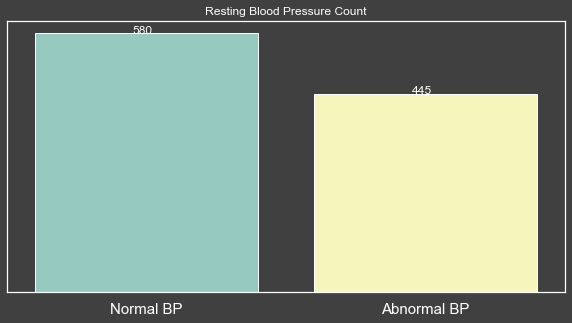

In [33]:
# Resting Blood Pressure
bp=[]
for k in data['RestingBloodPressure']:
    if (k > 130):
        bp.append(1) #high bp
    else:
        bp.append(0) #normal

ax = sns.countplot(x=bp,palette='Set3')

plt.title("Resting Blood Pressure Count")
plt.ylabel("")
plt.yticks([])
plt.xlabel("")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.5))
    
ax.set_xticklabels(["Normal BP","Abnormal BP"]);

## Splitting of data and building models

In [34]:
data=pd.read_csv(r"C:\Users\krishnavm\heart.csv")
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [35]:
X = data.drop(columns=['target'], axis=1).values #i/p columns
y = data['target'].values #o/p variables

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
print(X_train.shape) #i/p train-->o/p train
print(X_test.shape)  #i/p test-->o/p test
print(y_train.shape) #o/p train
print(y_test.shape)  #o/p test

(820, 13)
(205, 13)
(820,)
(205,)


In [50]:
#scaling of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform both datasets
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Building LogisticRegressionModel
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Logistic Regression Accuracy: {:.2f}%'.format(lr_accuracy*100))


Logistic Regression Accuracy: 80.49%


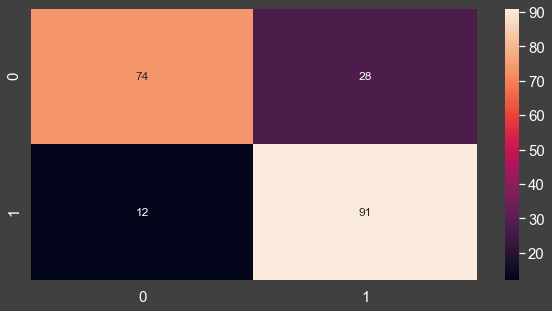

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm,annot=True);

In [53]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
 
print('Random Forest Classifier Accuracy: {:.2f}%'.format(rfc_accuracy*100))

Random Forest Classifier Accuracy: 82.93%


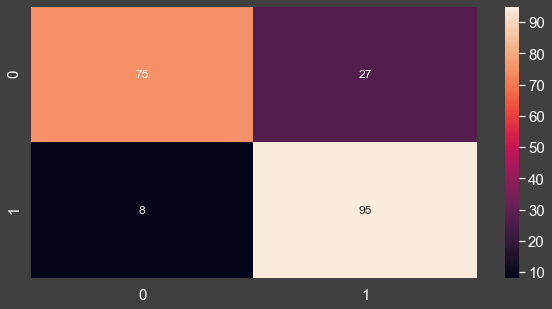

In [54]:
cm = confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm,annot=True);

In [55]:
# Knn classifier model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)  # n_neighbors means k
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print('KNeighborsClassifier Accuracy: {:.2f}%'.format(knn_accuracy*100))


KNeighborsClassifier Accuracy: 89.27%


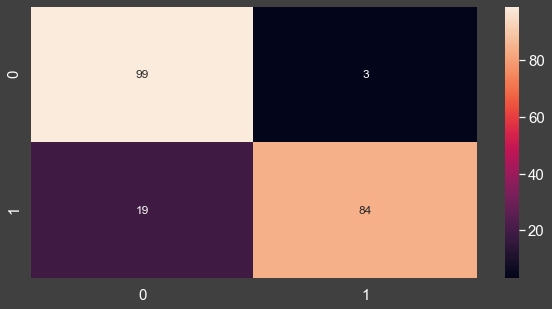

In [56]:
cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(cm,annot=True);

In [57]:
#gausian naives bayes classifier model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print('Naive Bayes Accuracy: {:.2f}%'.format(nb_accuracy*100))

Naive Bayes Accuracy: 80.00%


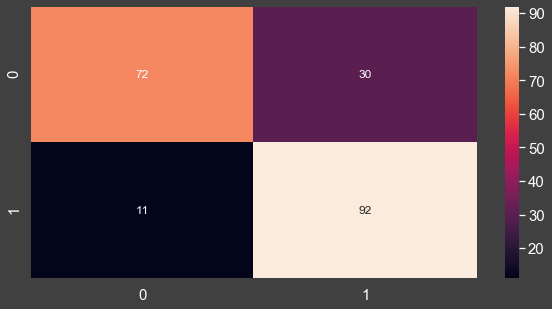

In [58]:
cm = confusion_matrix(y_test,nb_pred)
sns.heatmap(cm,annot=True);

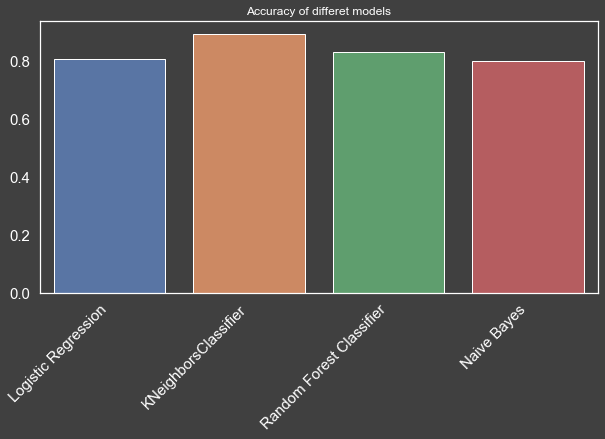

In [59]:
models = ['Logistic Regression','KNeighborsClassifier','Random Forest Classifier','Naive Bayes']
accuracy = [lr_accuracy,knn_accuracy,rfc_accuracy,nb_accuracy]

ax = sns.barplot(models,accuracy)

plt.title("Accuracy of differet models")

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

## observation- we can conclude that k neighbors classifir model is the best fit four our data set producing the highest accuracy score.